In [1]:
import seaborn as sns
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_regression, chi2, mutual_info_regression
from scipy.stats.stats import pearsonr

In [2]:
x_train = pd.read_csv('x_train_high_correlation_removed.csv')
y_train = pd.read_csv('y_train.csv')

In [3]:
concat_df = pd.concat([x_train, y_train], axis = 1)

<h4> Visualise correlation of todays reports to each other feature <h4>

c:\users\chris\appdata\local\programs\python\python39\lib\site-packages\seaborn\axisgrid.py:1559: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = plt.figure(figsize=(height, height))


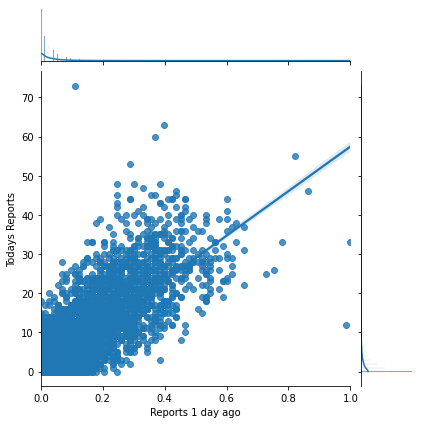

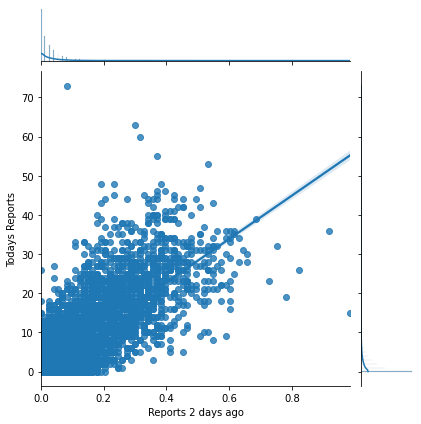

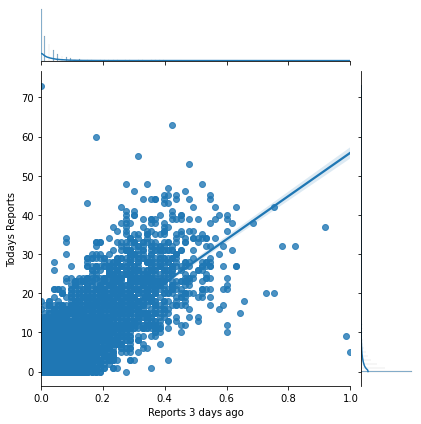

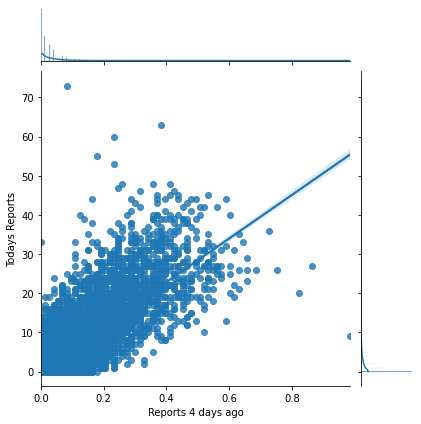

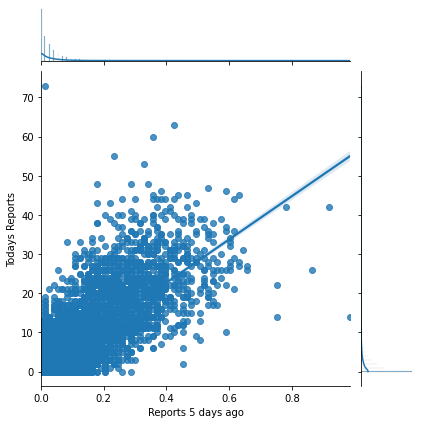

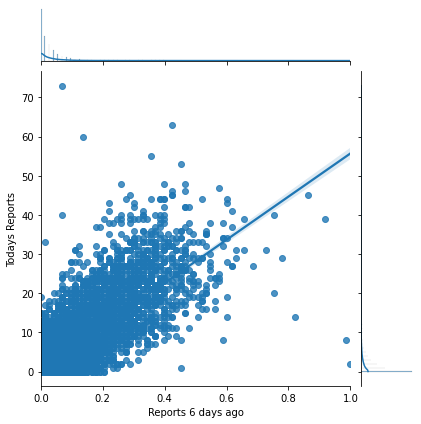

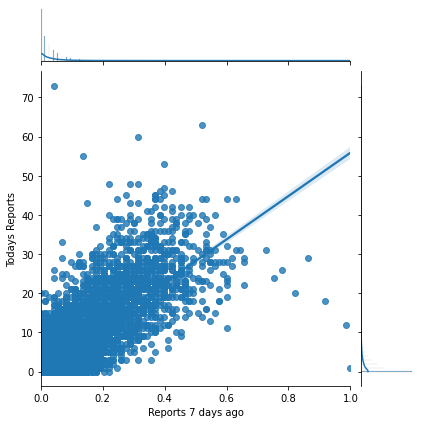

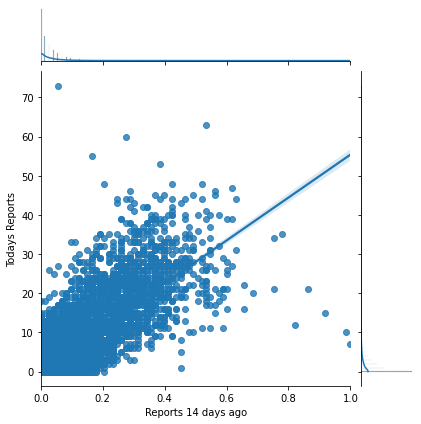

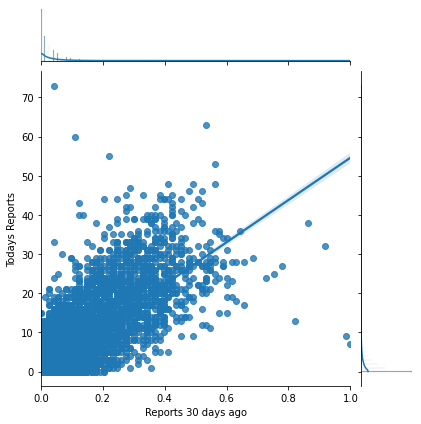

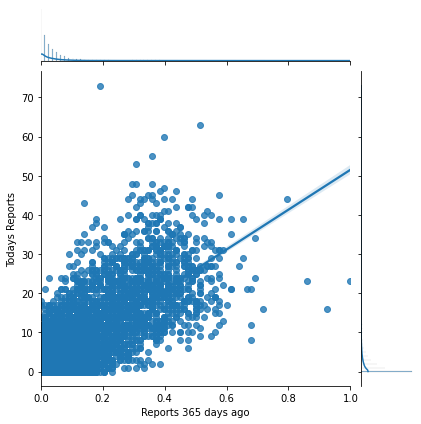

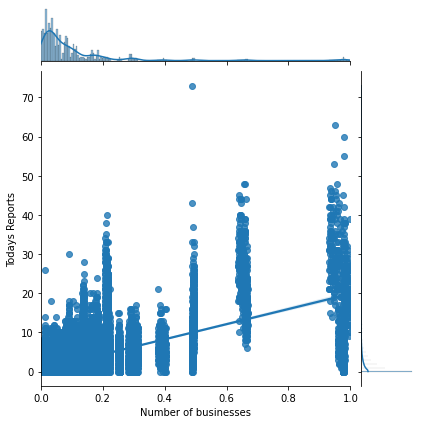

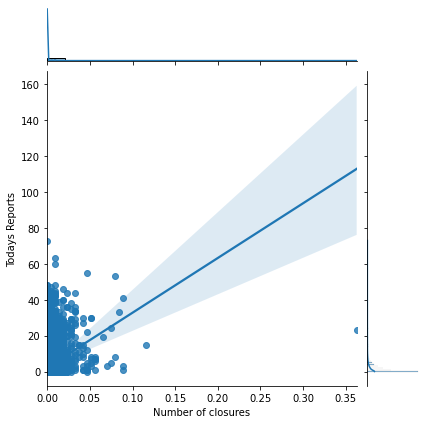

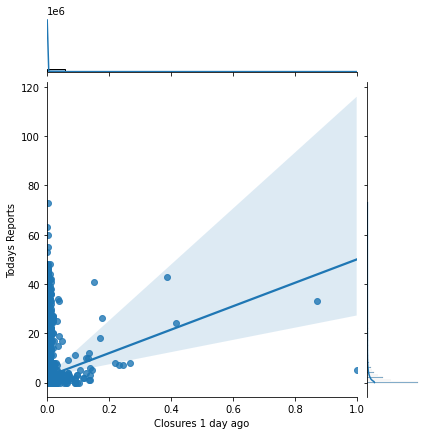

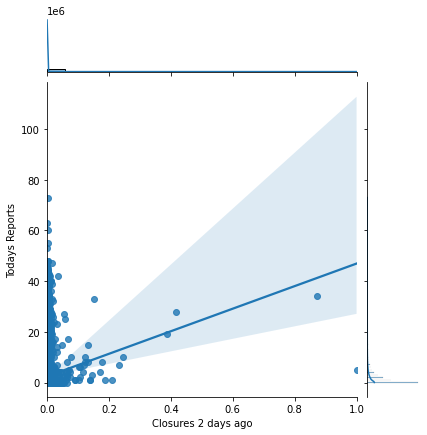

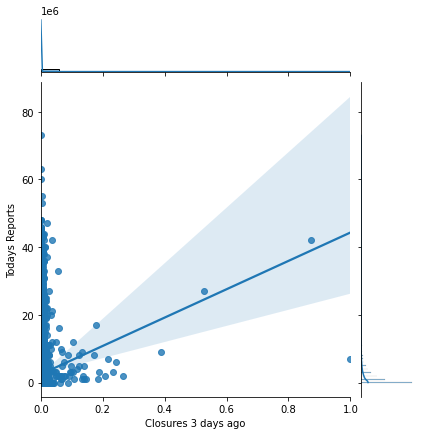

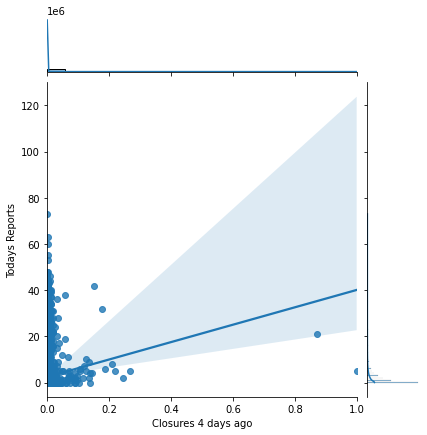

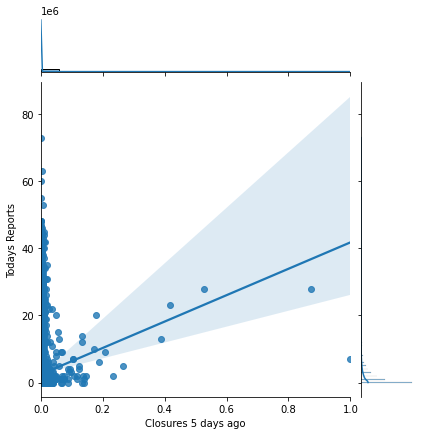

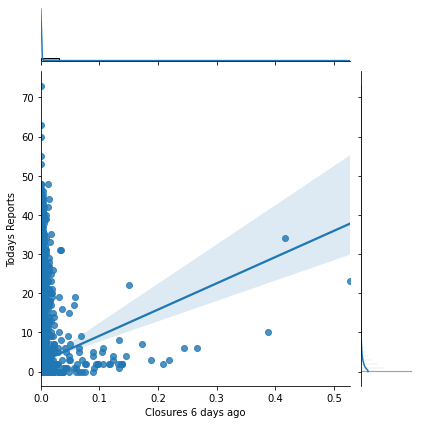

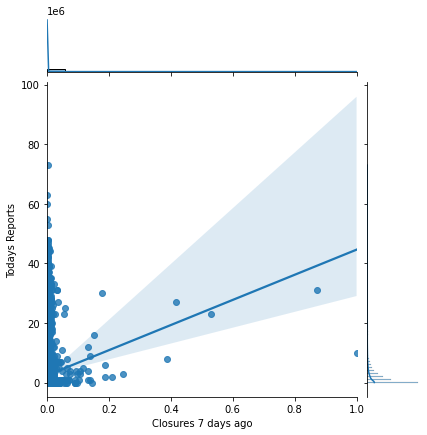

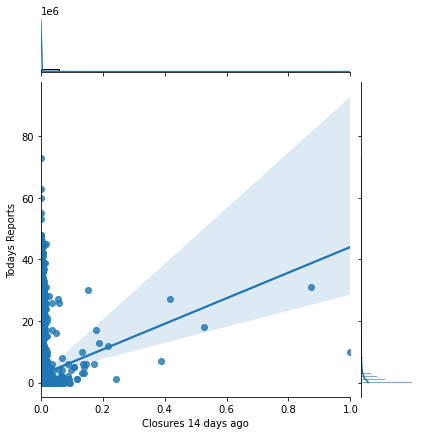

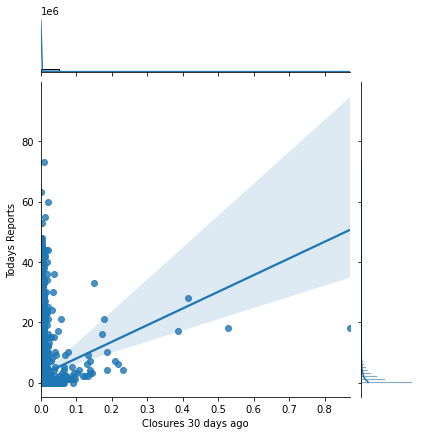

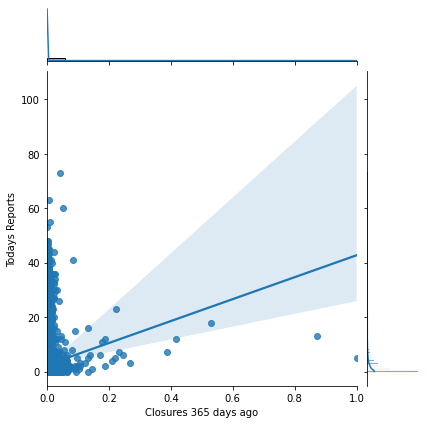

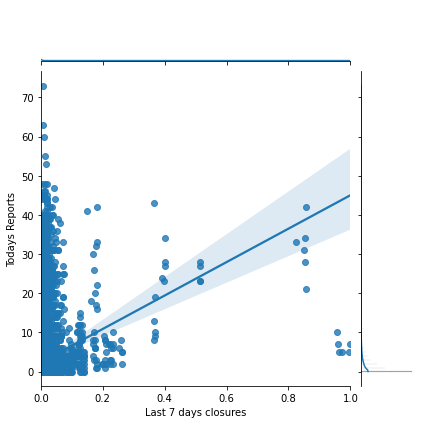

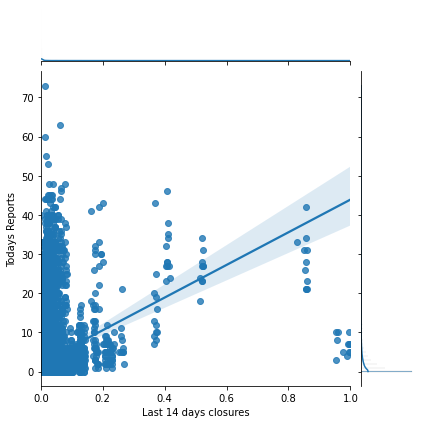

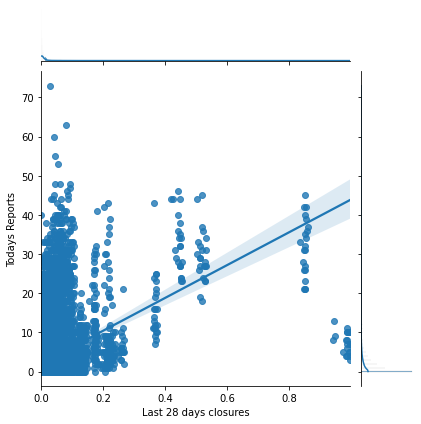

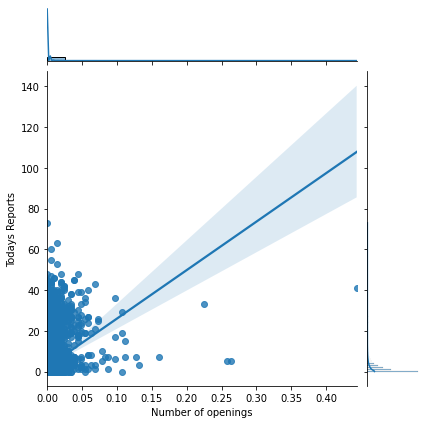

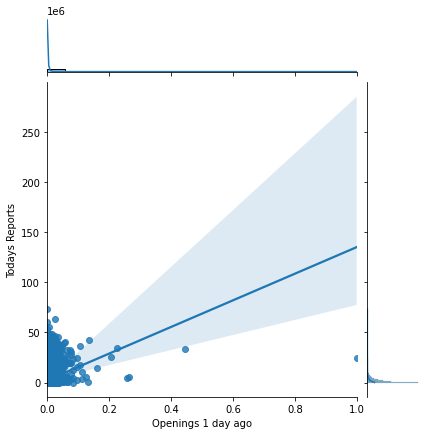

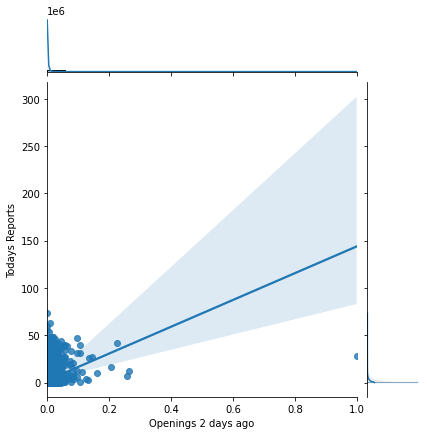

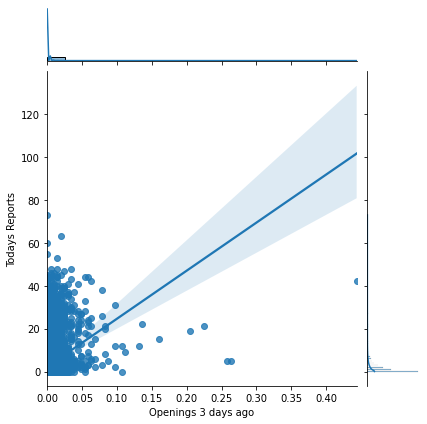

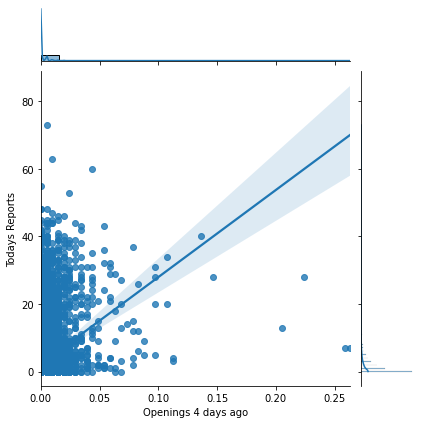

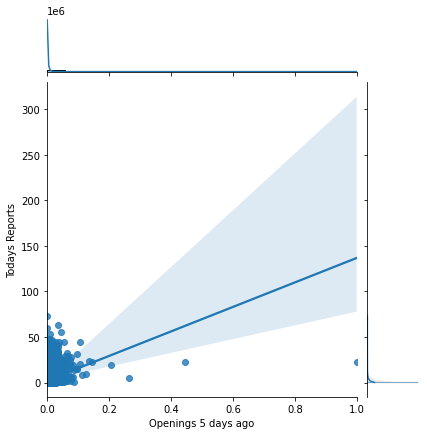

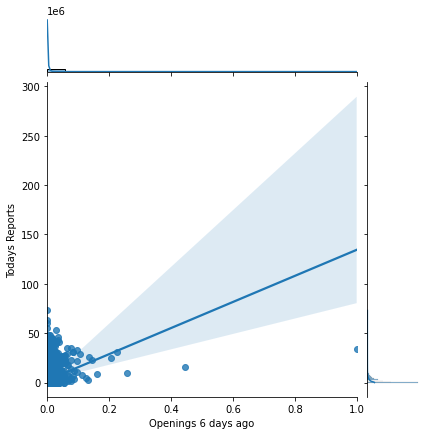

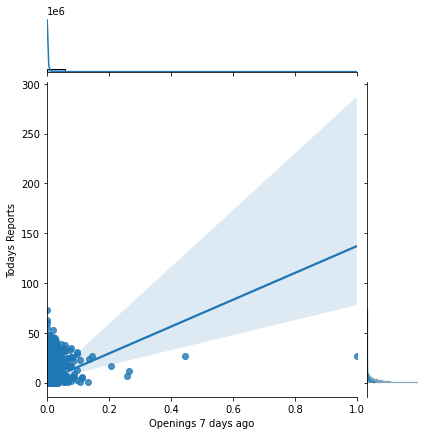

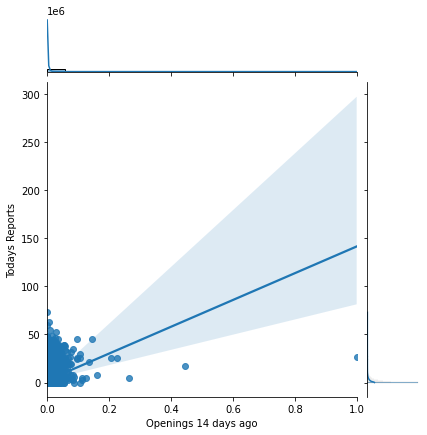

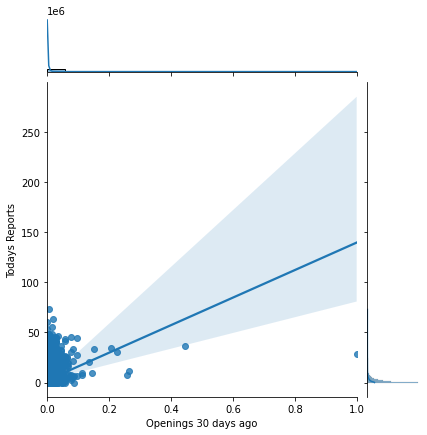

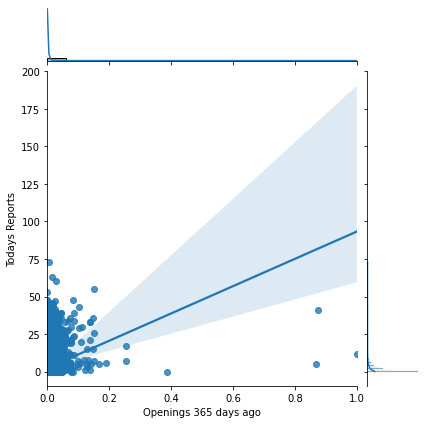

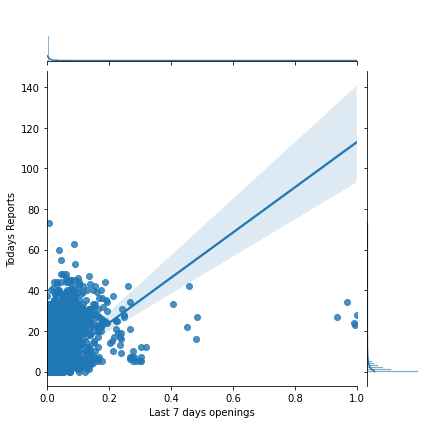

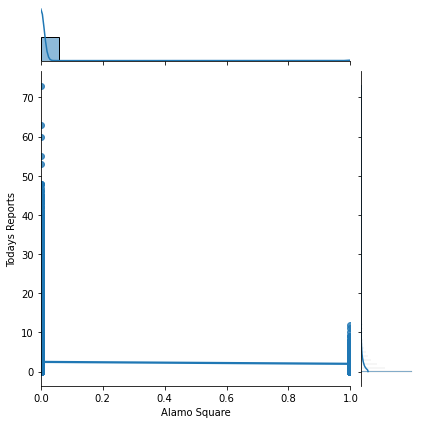

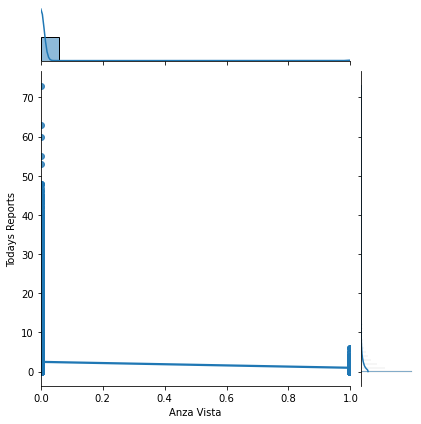

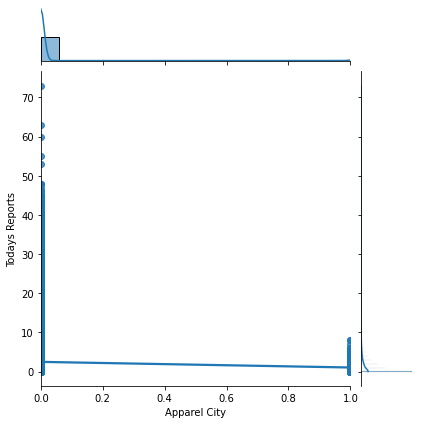

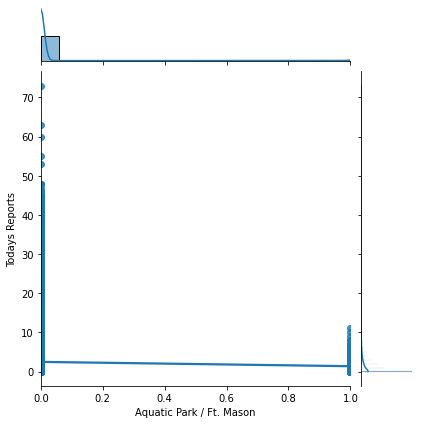

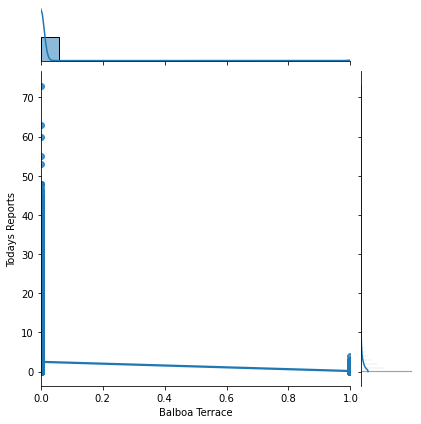

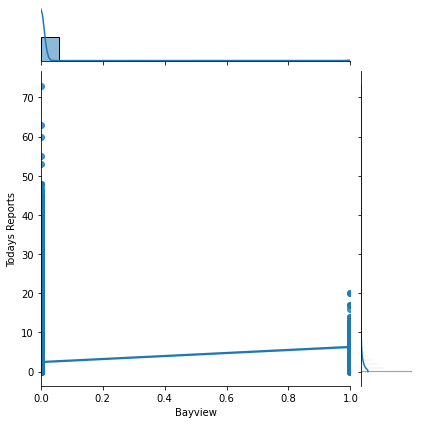

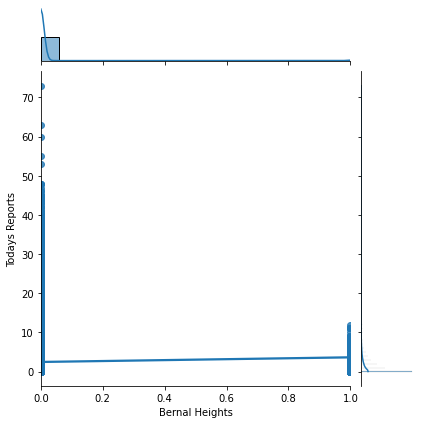

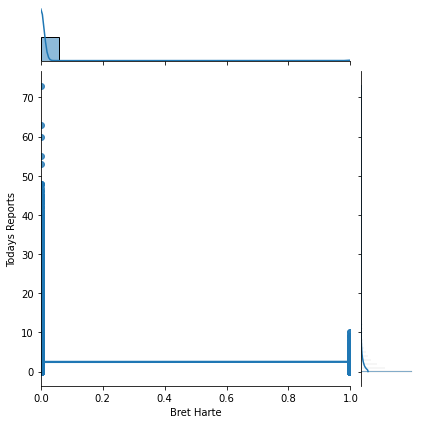

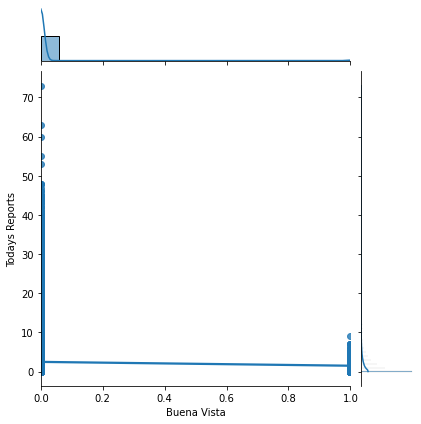

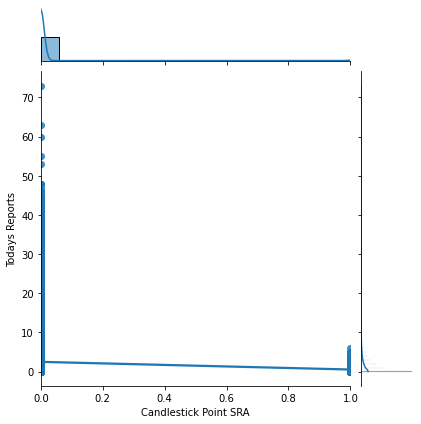

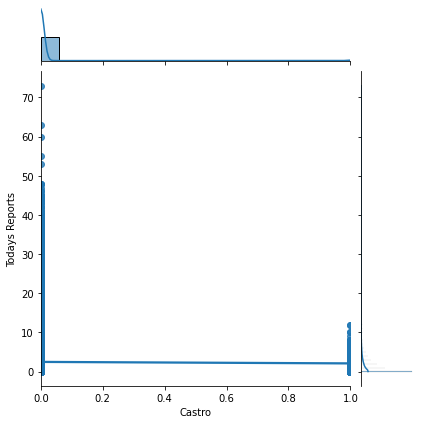

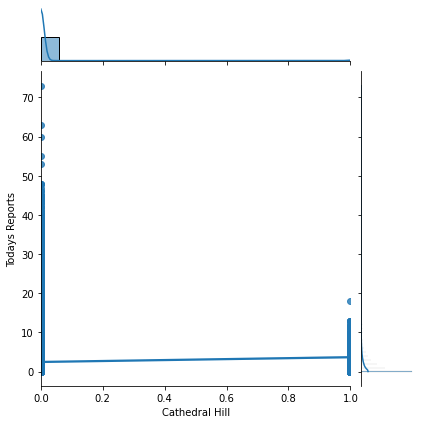

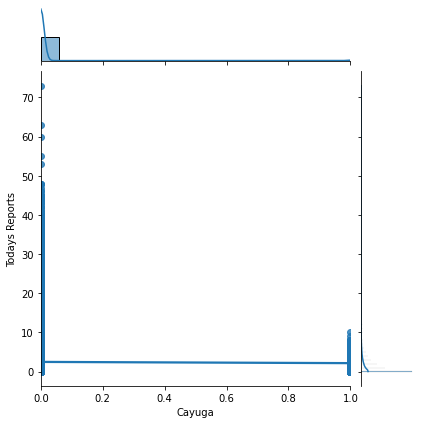

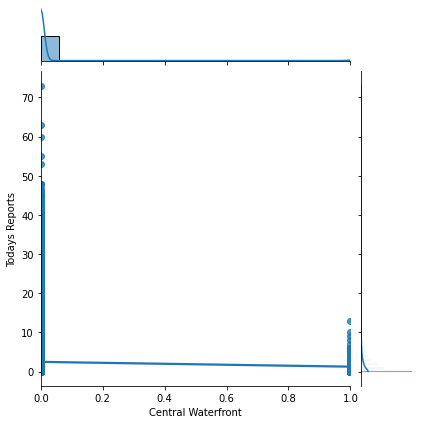

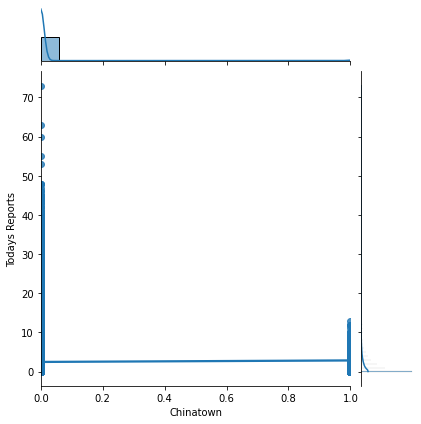

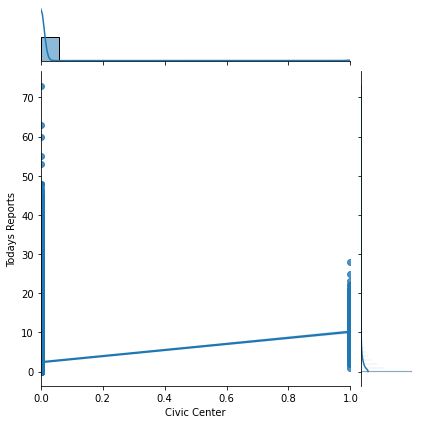

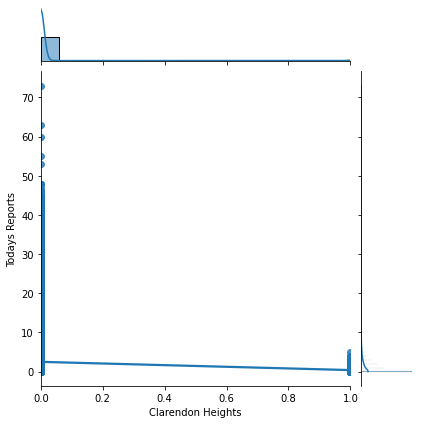

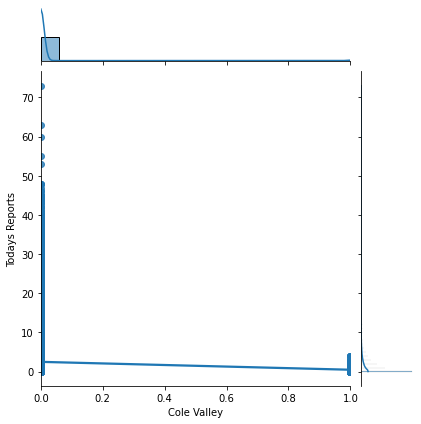

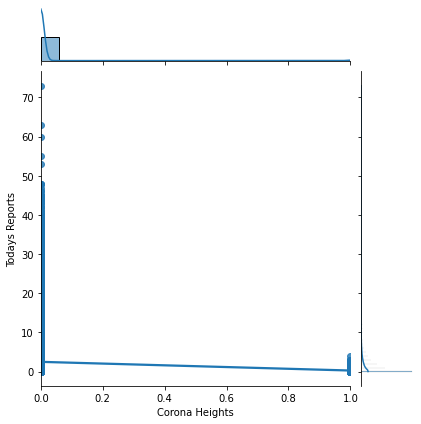

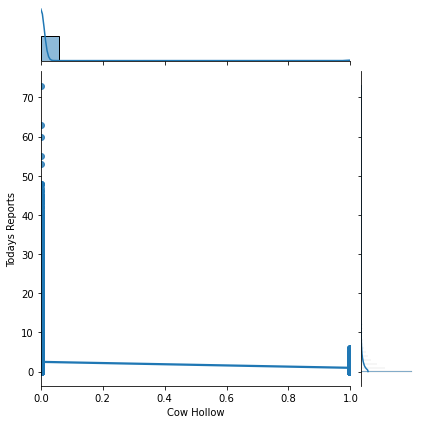

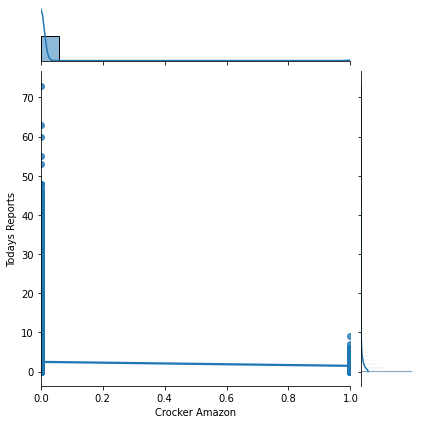

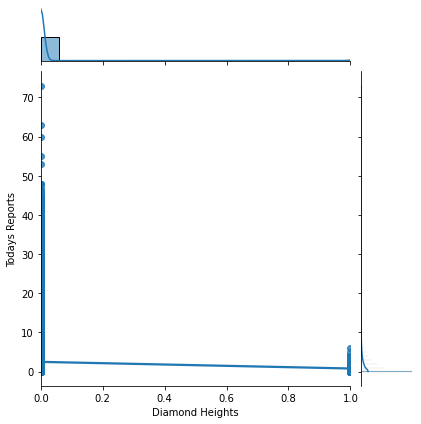

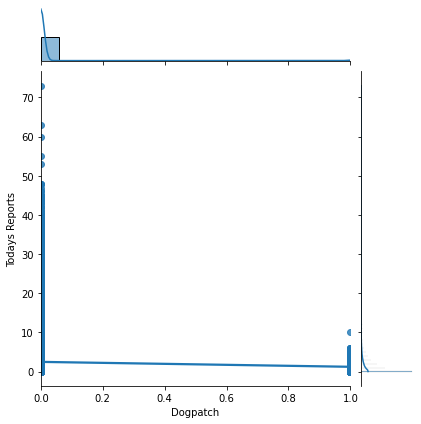

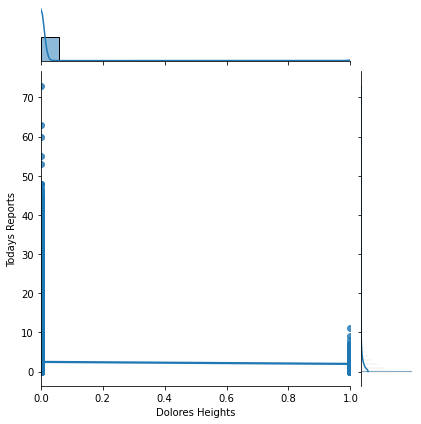

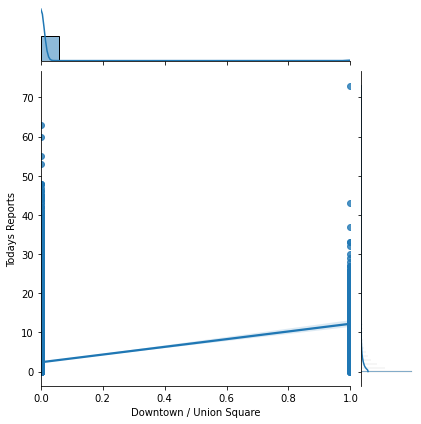

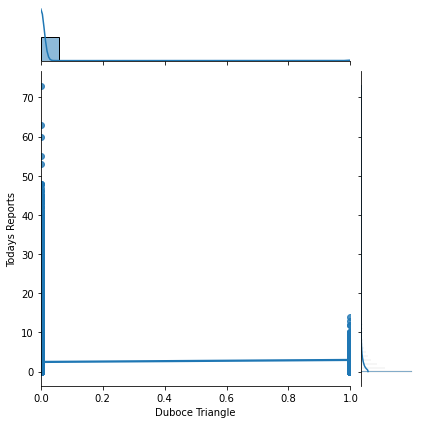

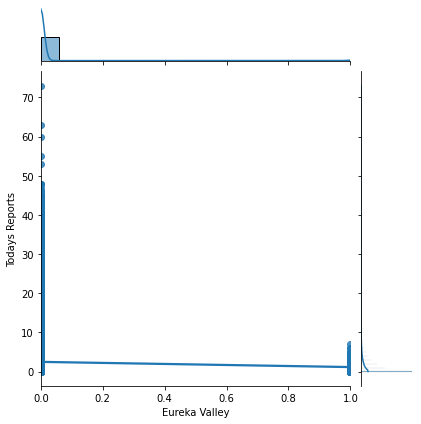

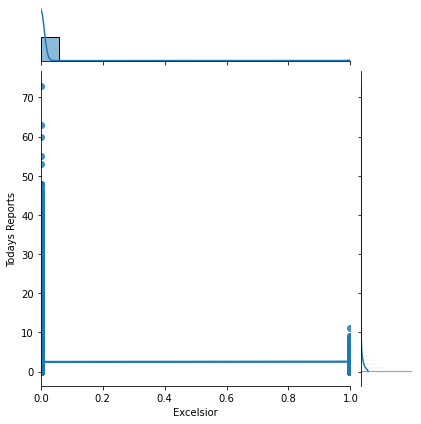

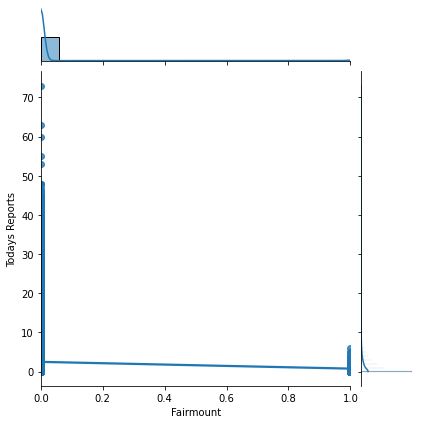

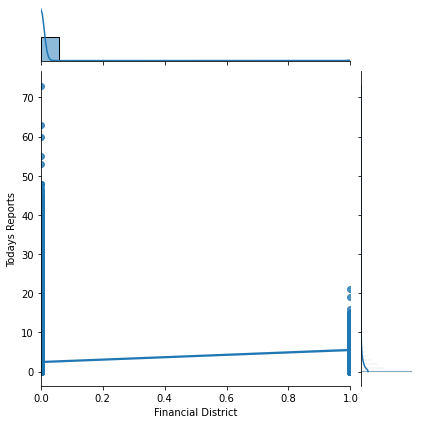

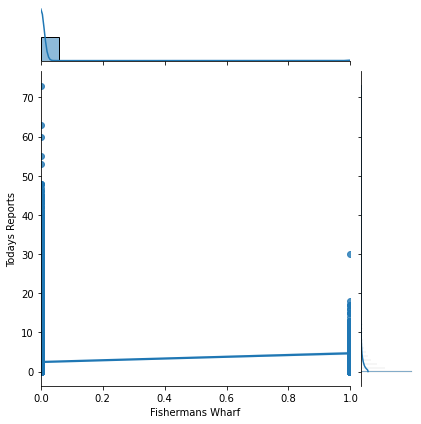

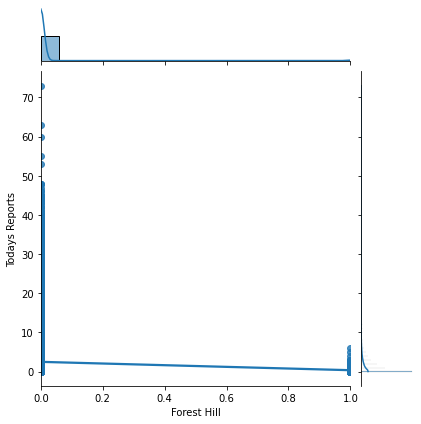

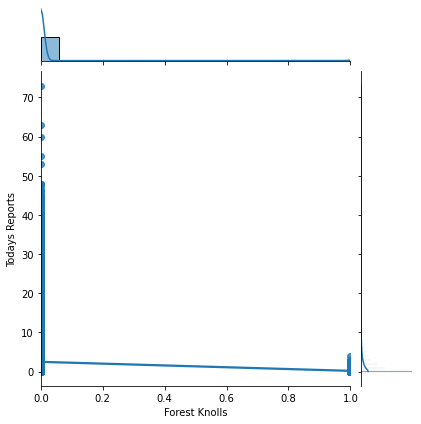

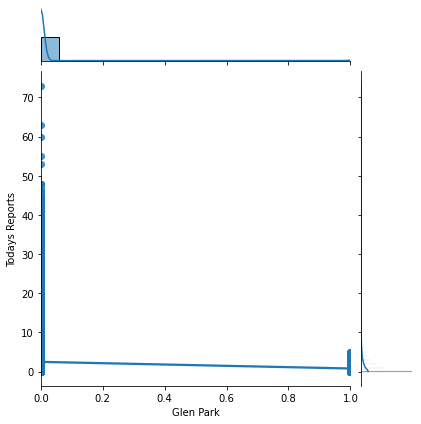

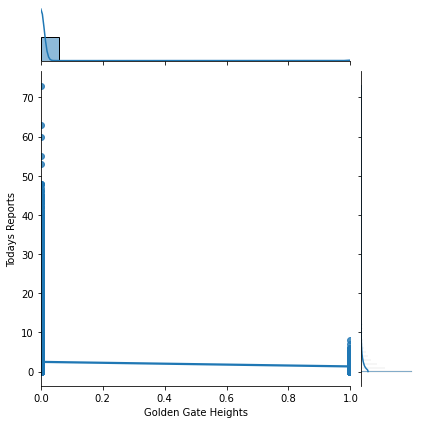

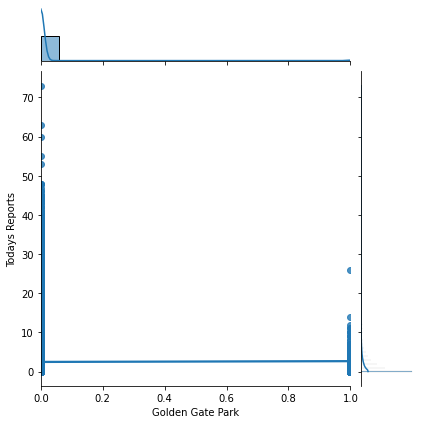

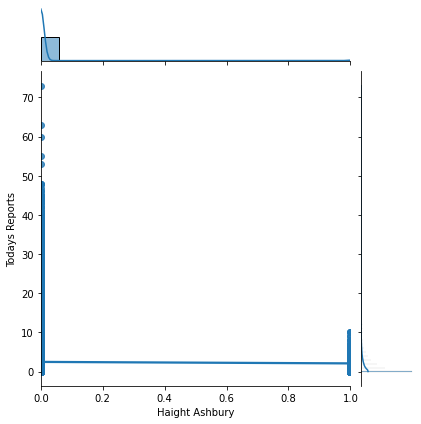

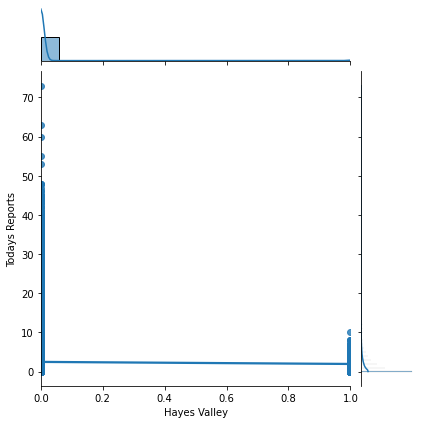

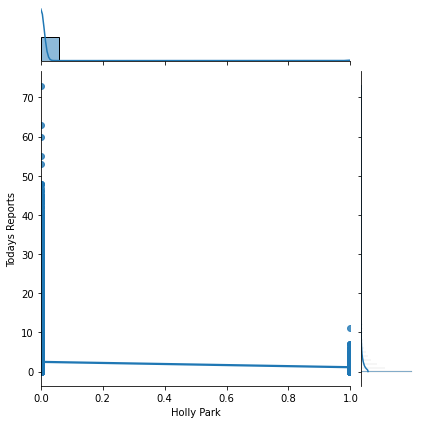

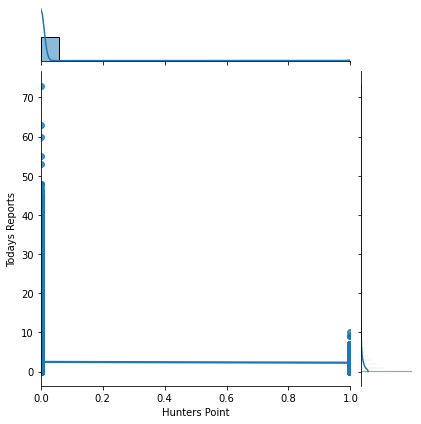

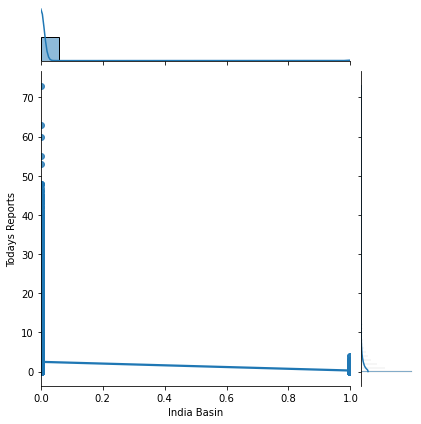

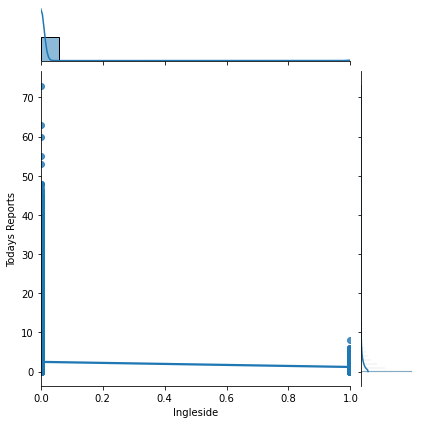

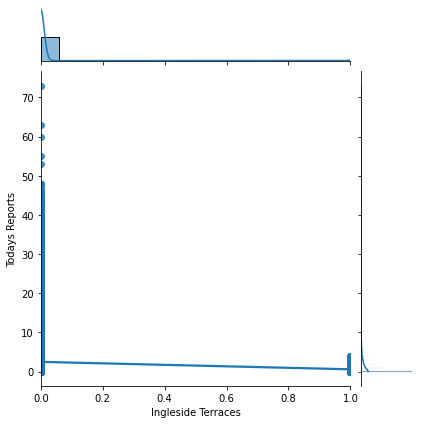

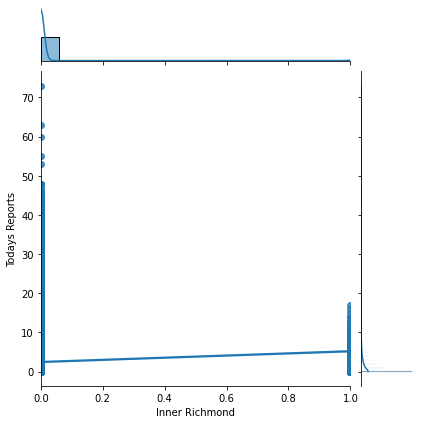

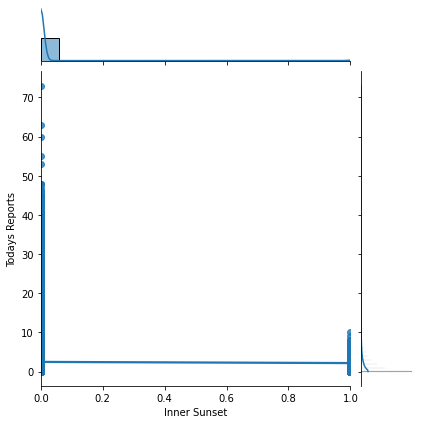

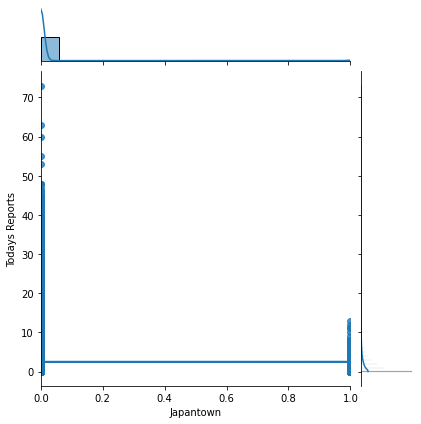

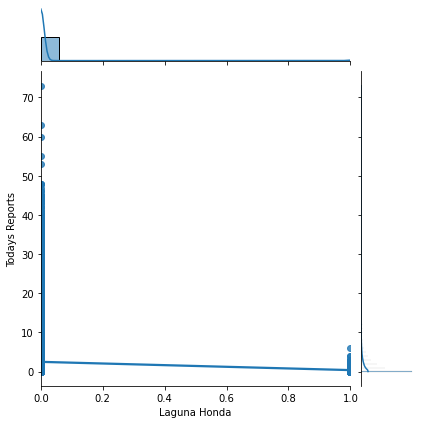

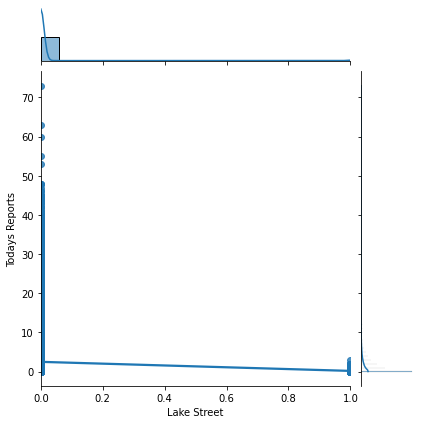

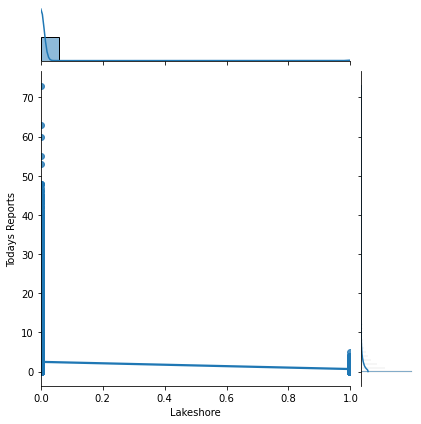

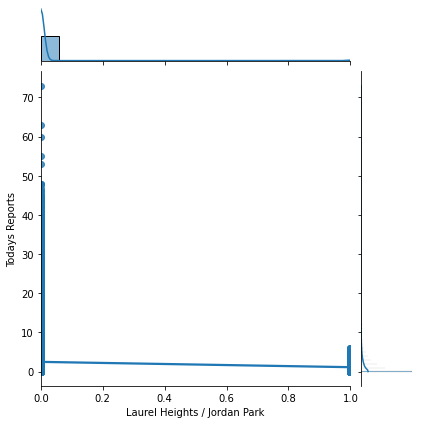

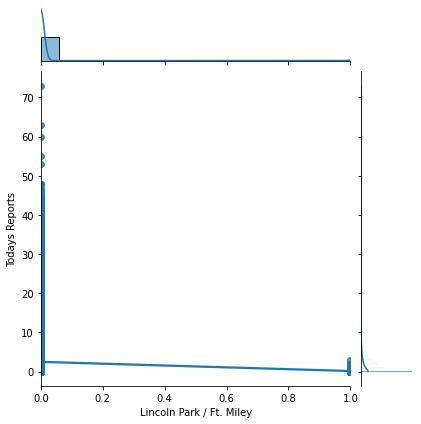

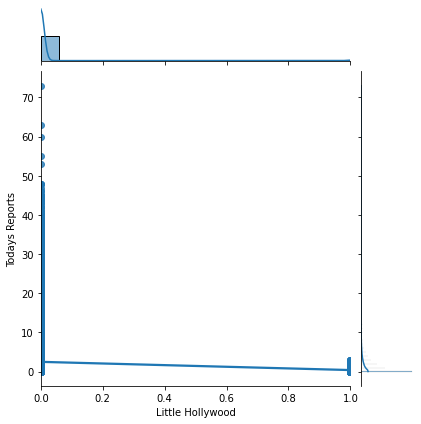

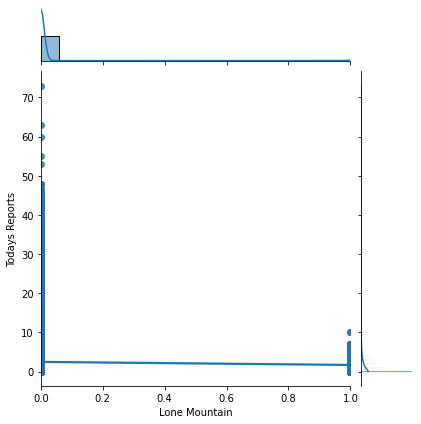

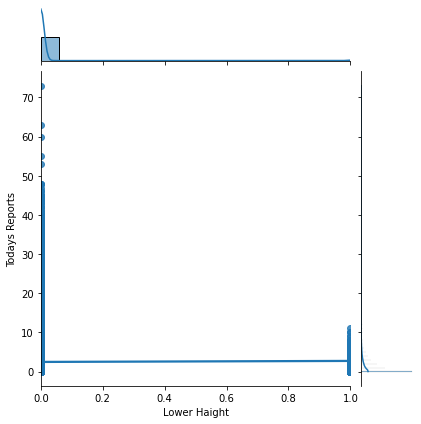

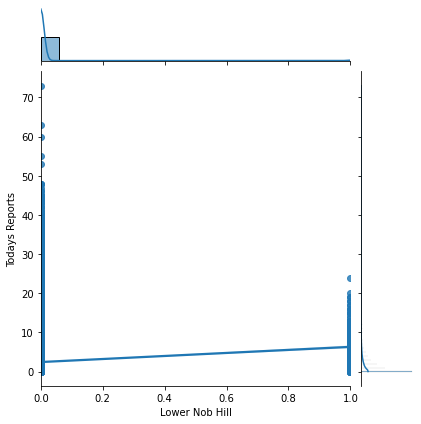

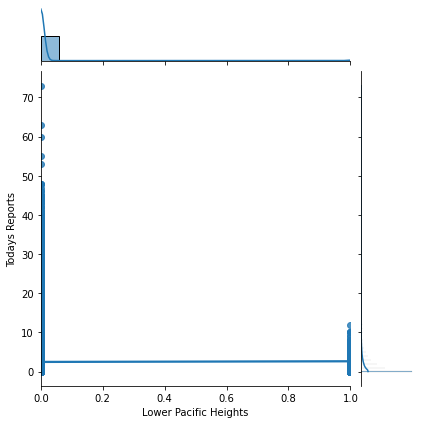

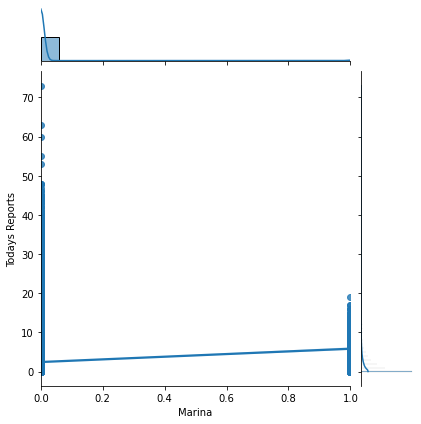

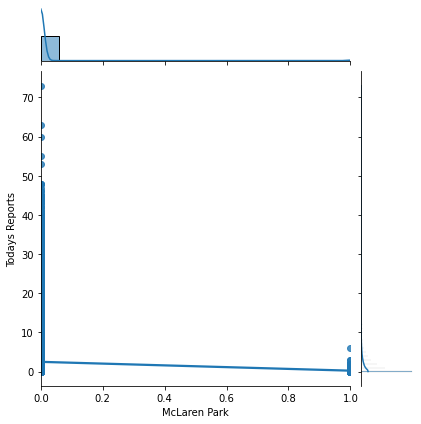

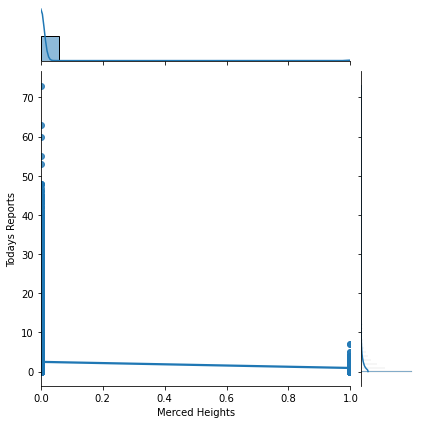

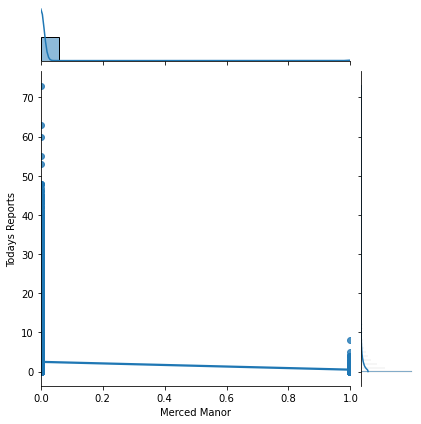

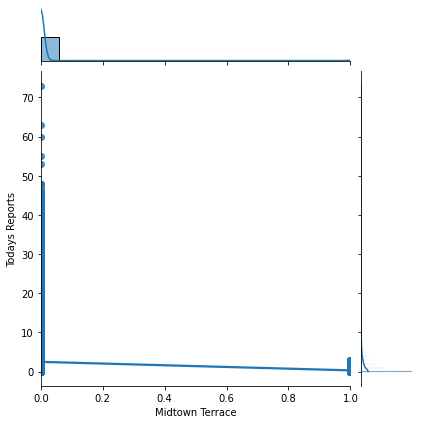

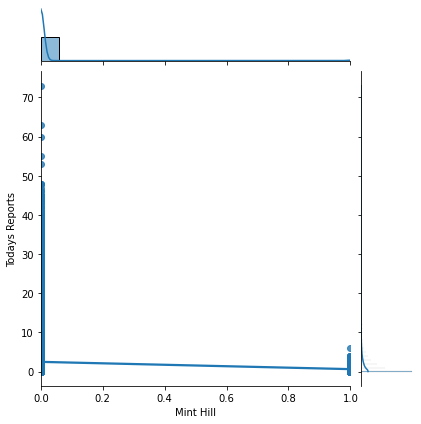

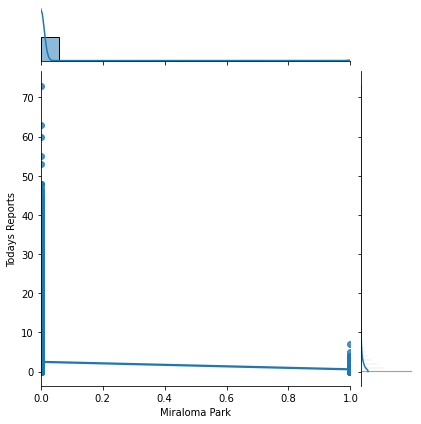

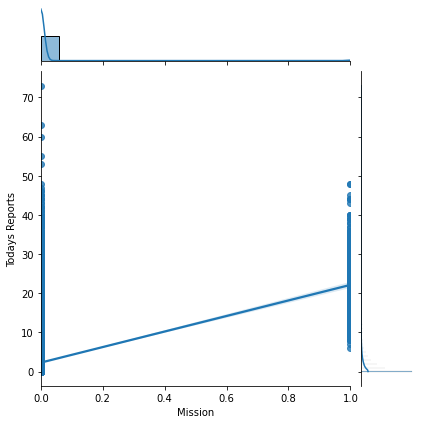

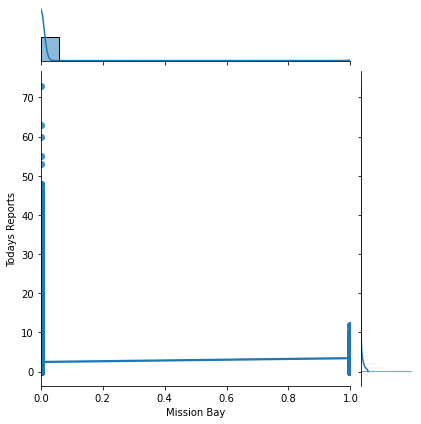

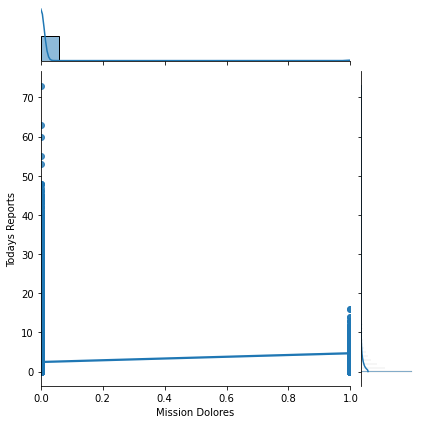

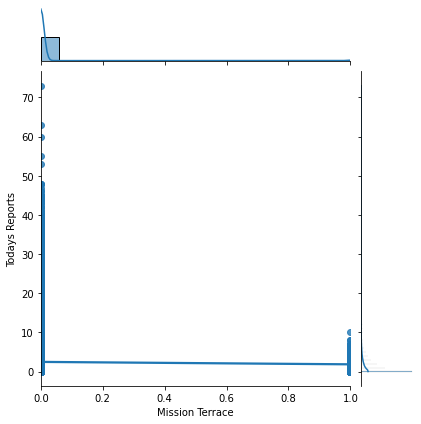

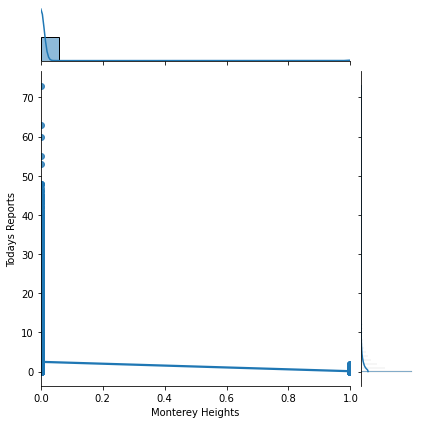

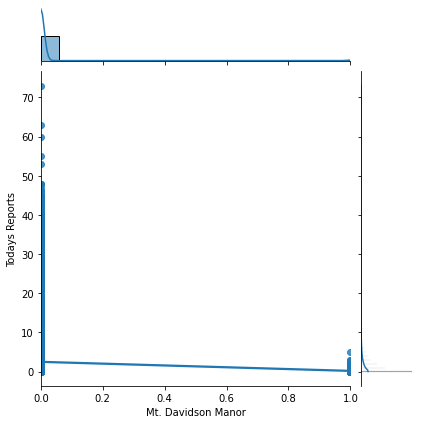

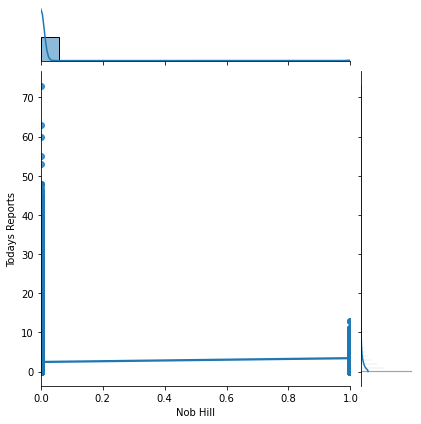

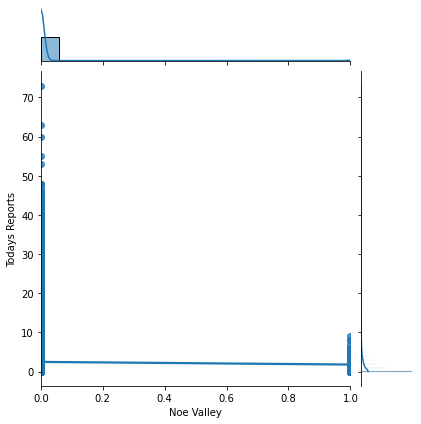

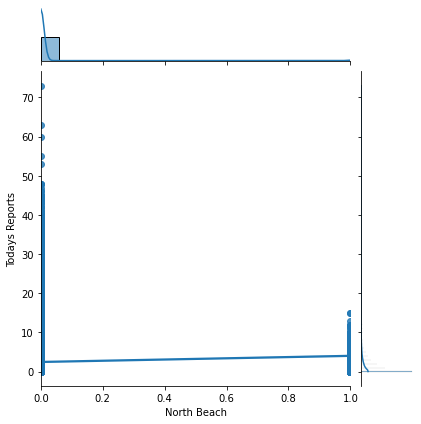

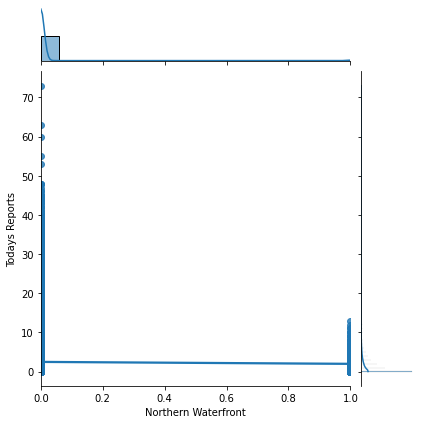

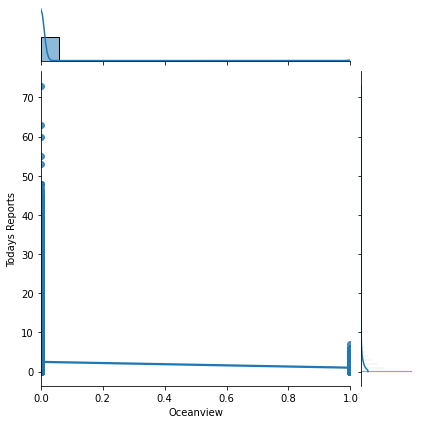

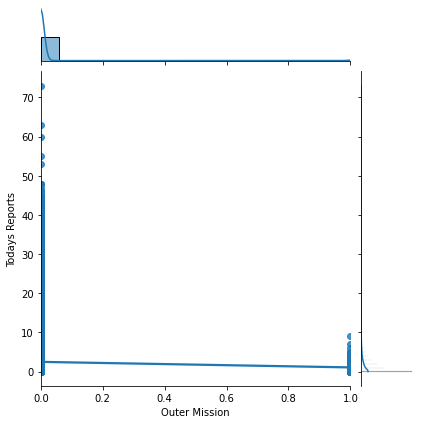

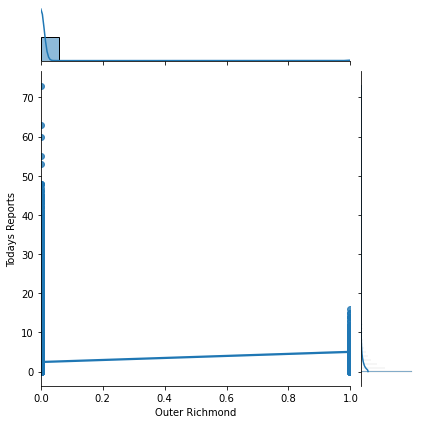

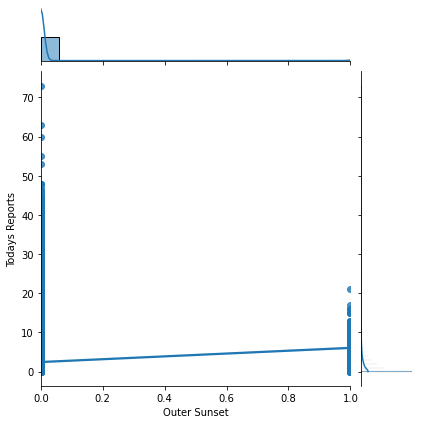

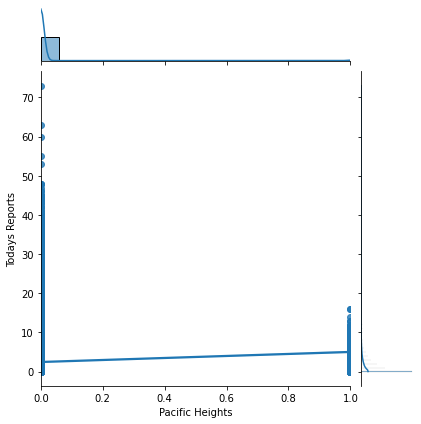

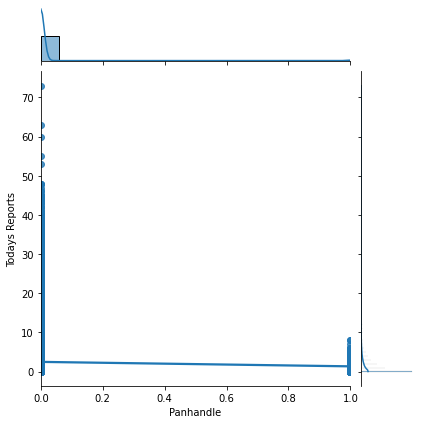

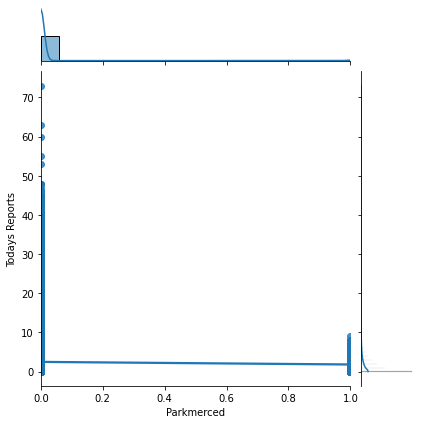

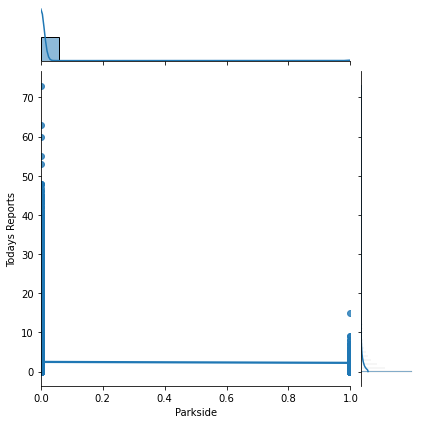

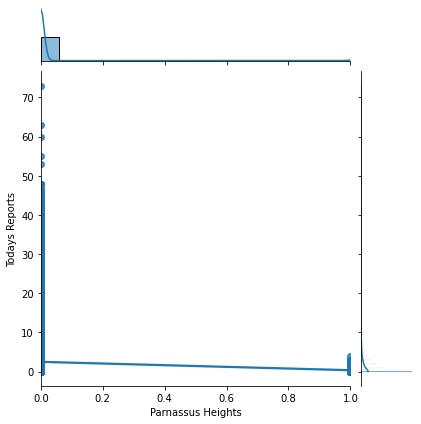

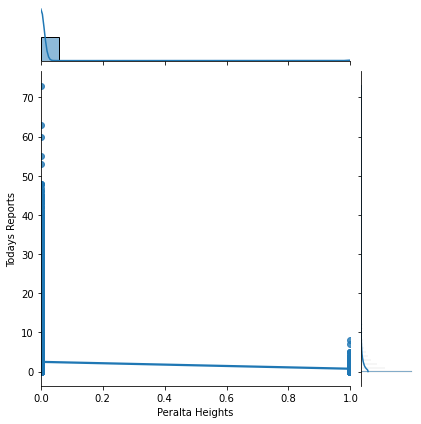

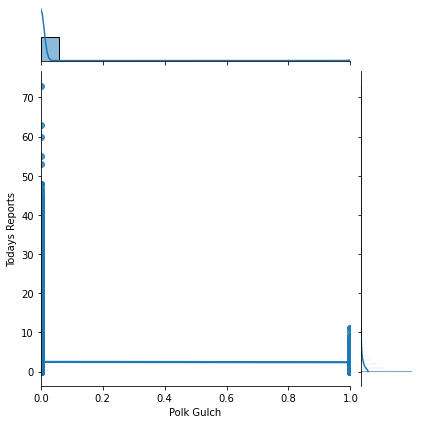

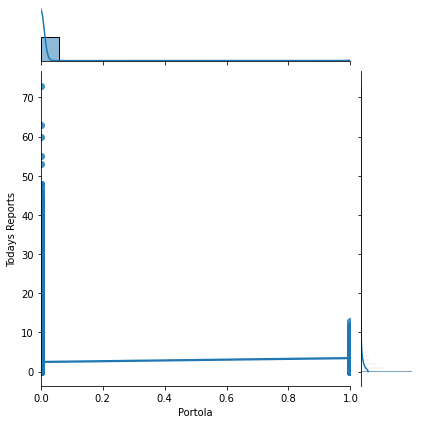

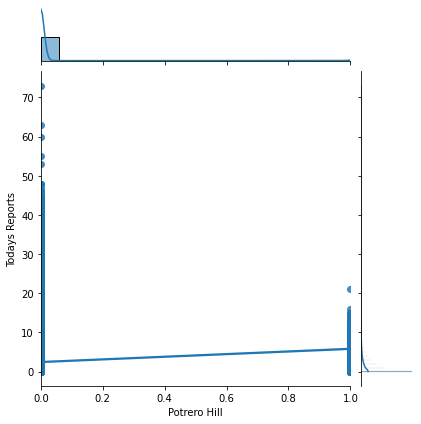

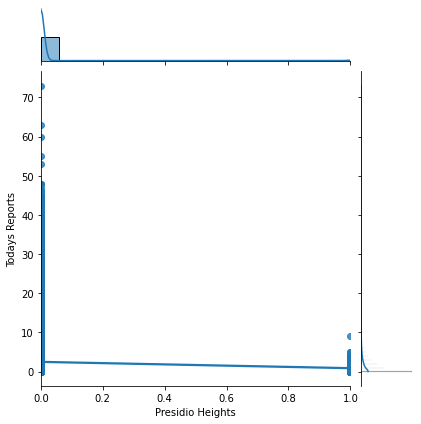

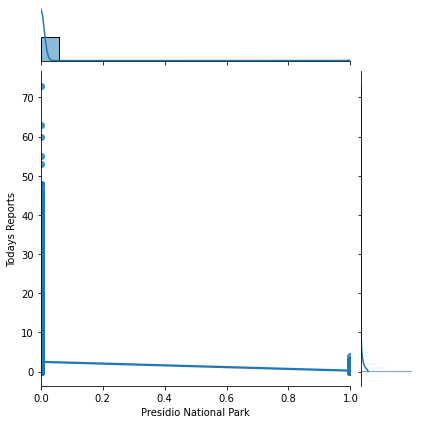

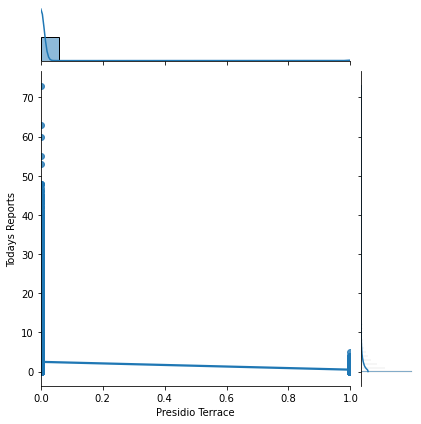

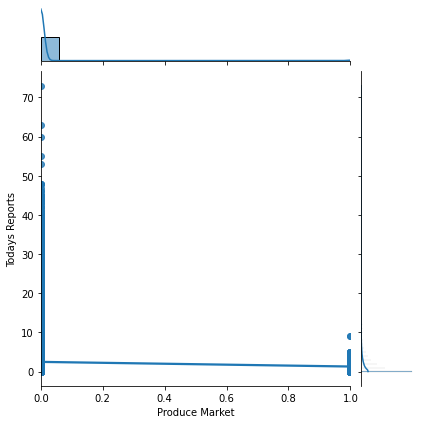

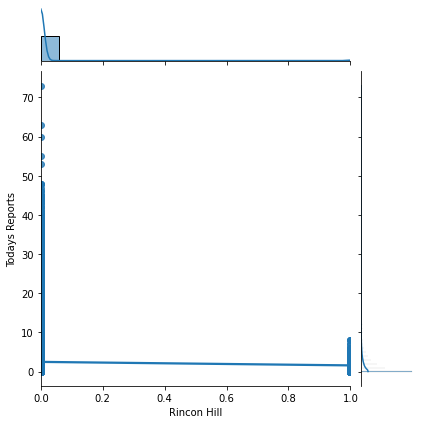

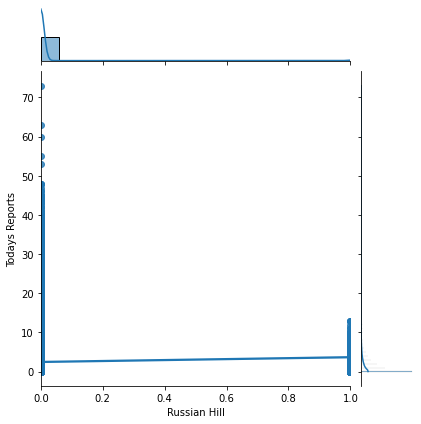

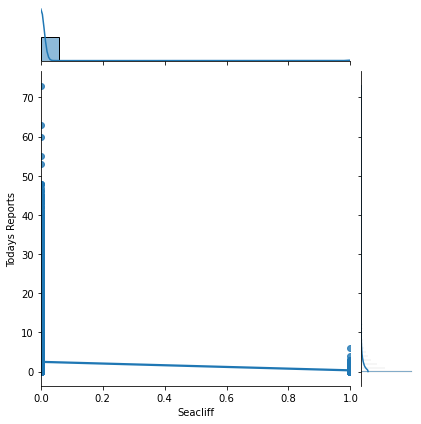

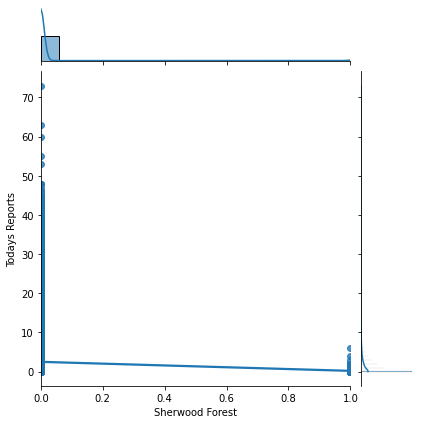

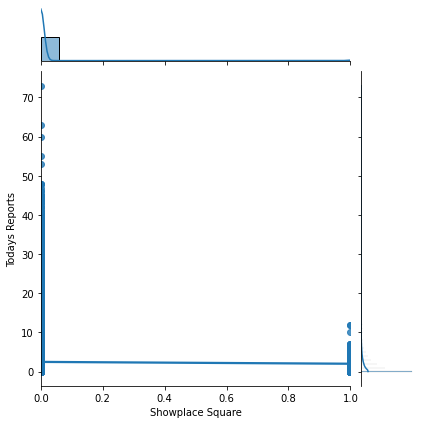

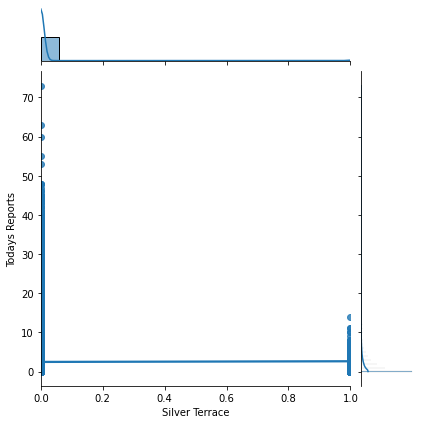

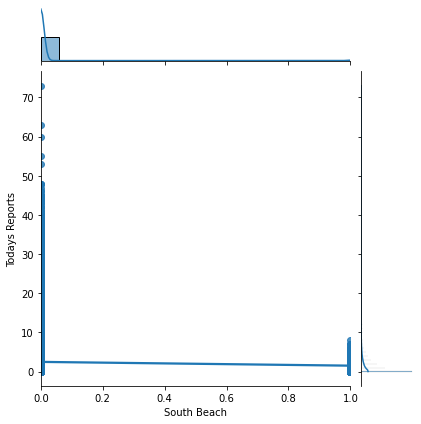

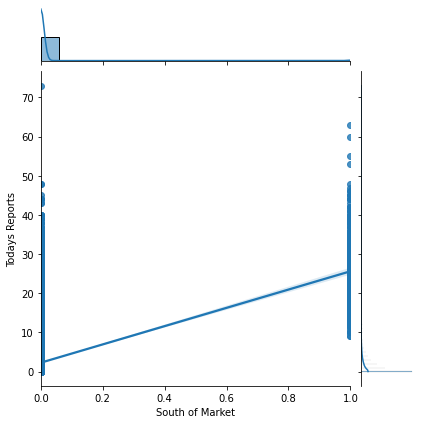

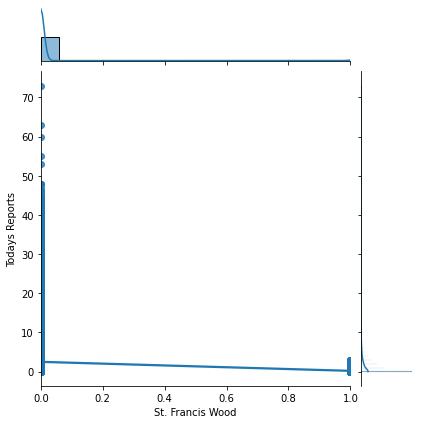

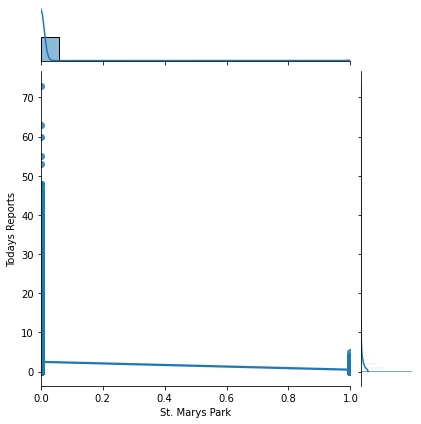

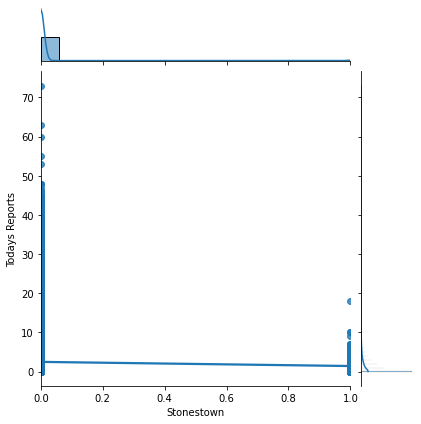

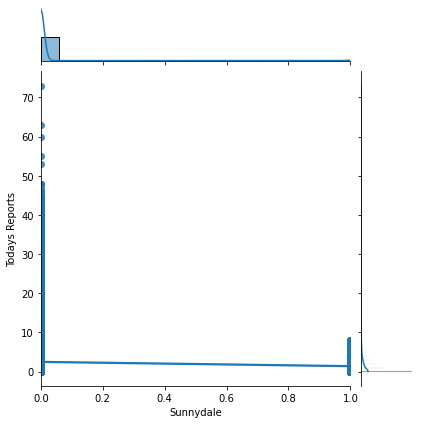

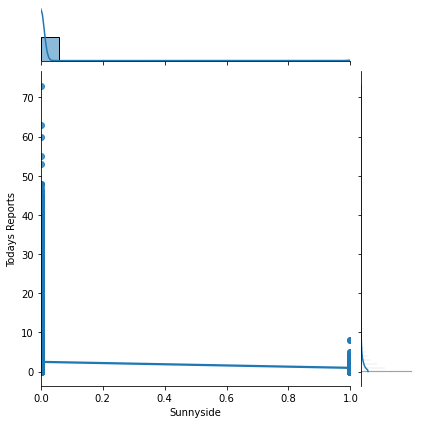

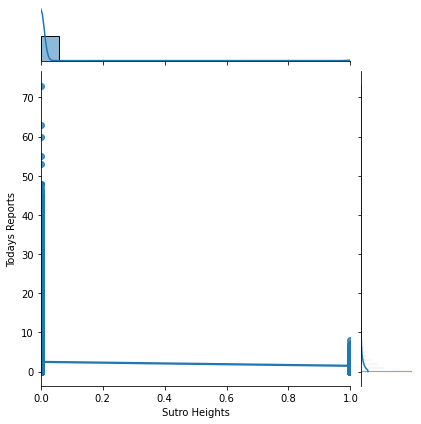

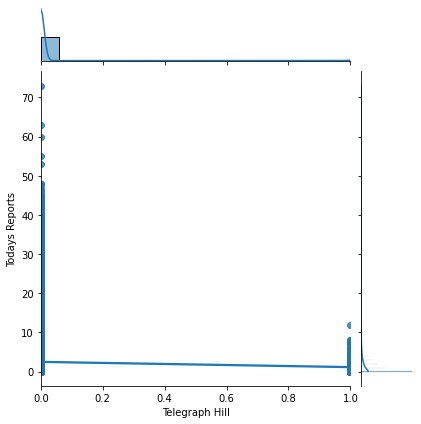

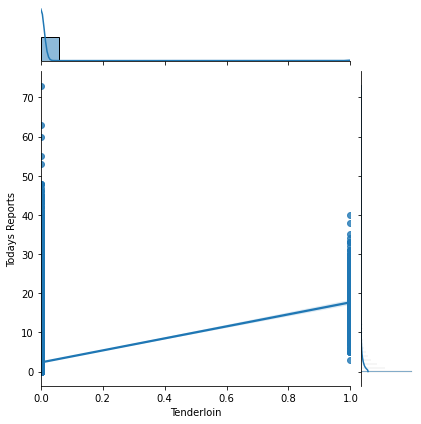

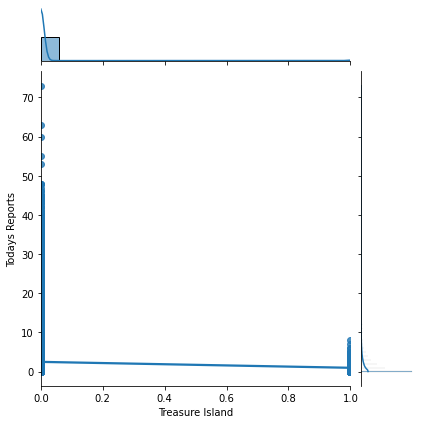

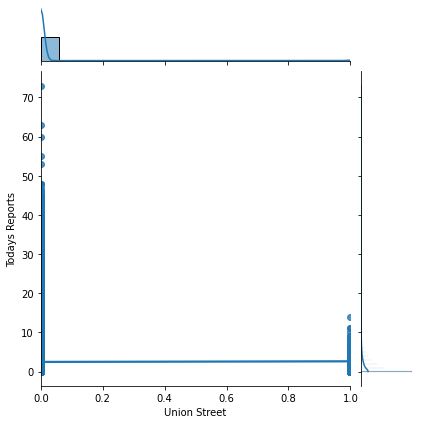

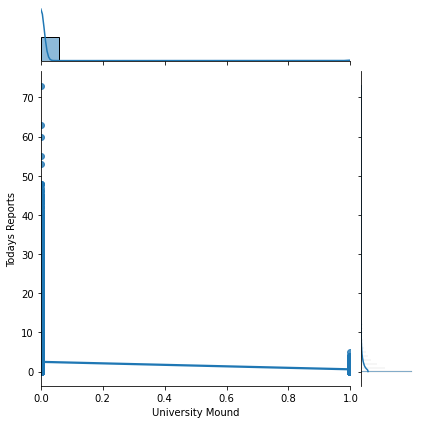

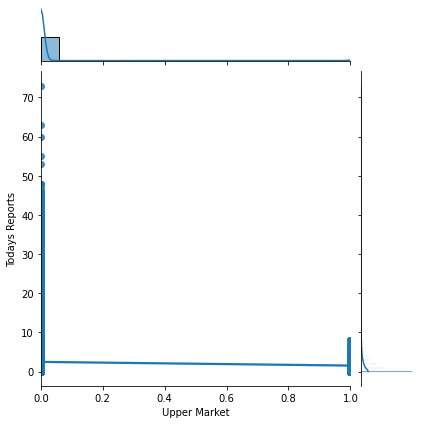

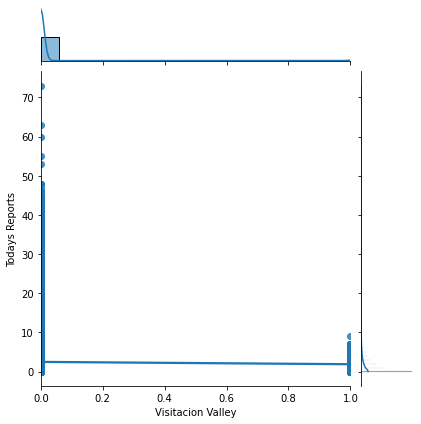

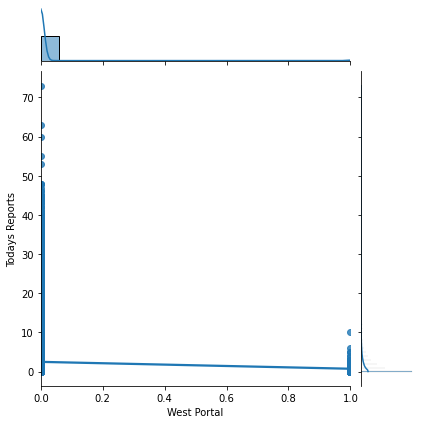

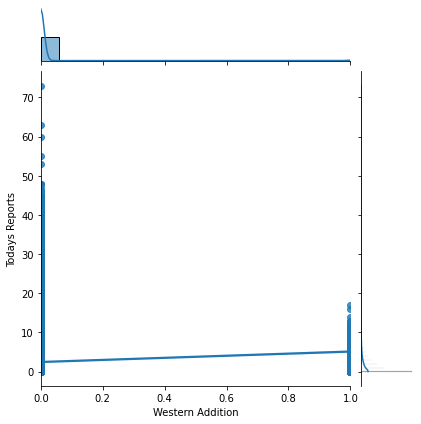

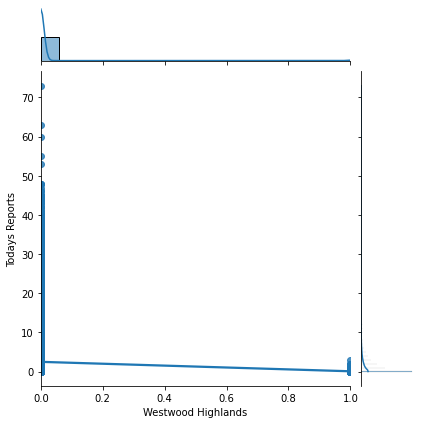

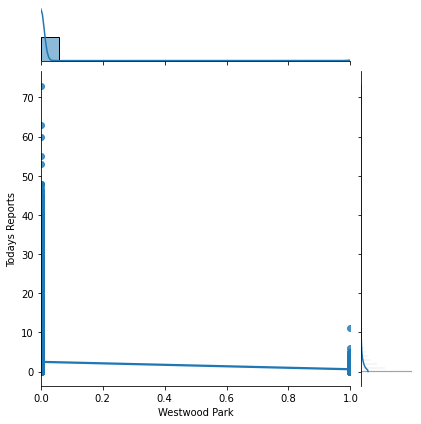

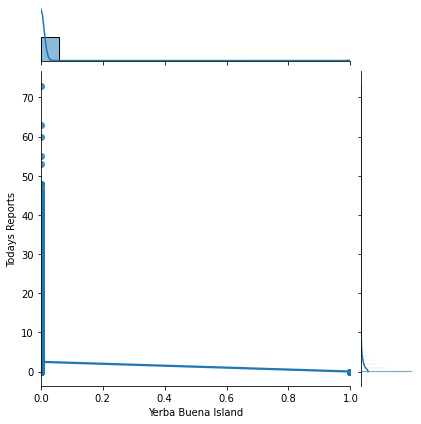

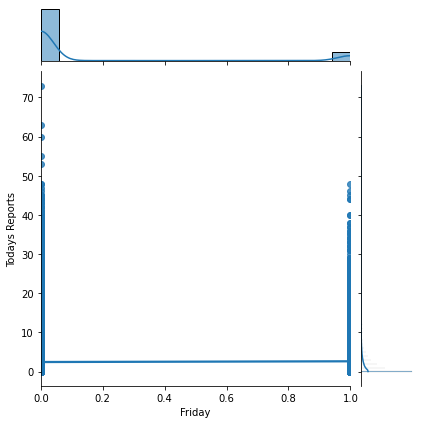

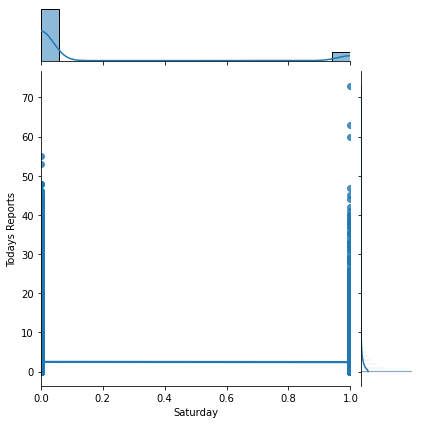

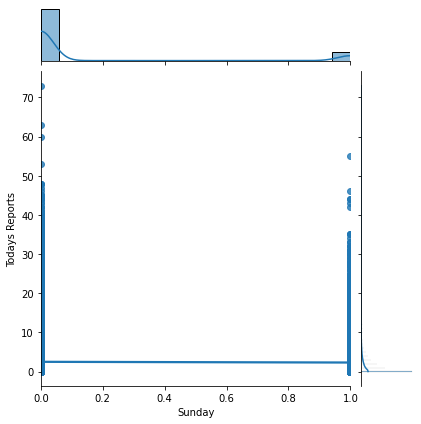

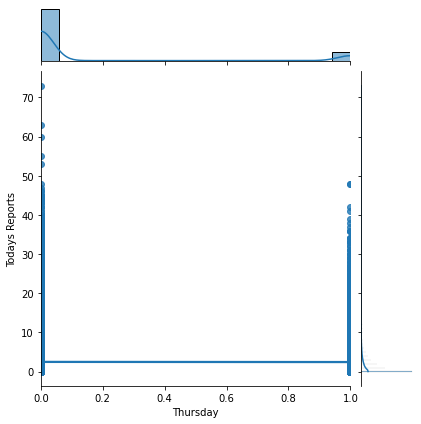

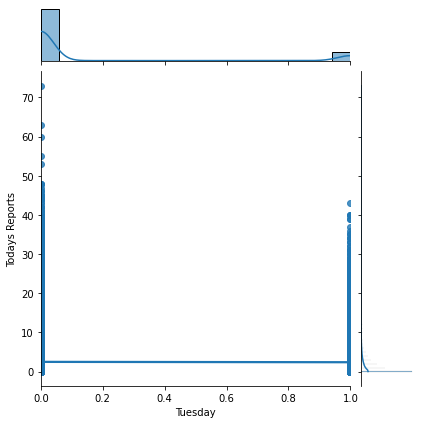

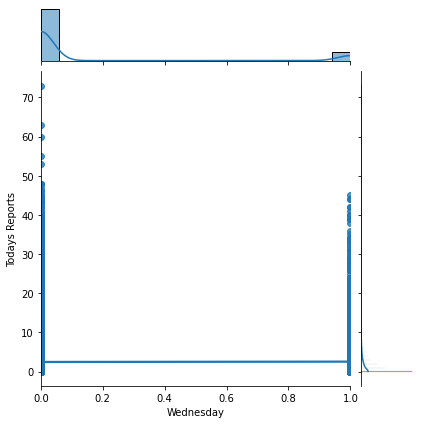

In [4]:
for col in x_train.columns:
    plot = sns.jointplot(x = col, y = "Todays Reports", data = concat_df, kind = 'reg')

In [5]:
# Results of graphs suggest some features have a strong relationship with target but there are too many
# to make a meaningful decision

In [6]:
#correlation analysis of correlation to todays reports using pearson correlation
corr_list = []
y_train_array = y_train.astype(float).to_numpy()
y_train_array_flat = []
for sublist in y_train_array:
    for crime_rate in sublist:
        y_train_array_flat.append(crime_rate)
for col in x_train.columns:
    x_train_array = x_train[col].astype(float).to_numpy()
    corr_data = pearsonr(x_train[col].to_numpy(), y_train_array_flat)
    corr_list.append([col, corr_data[0], corr_data[1]])

In [7]:
#The lowest p-values are likely candidates for feature selection

In [10]:
corr_df = pd.DataFrame(corr_list, columns = ['Feature', 'Correlation to todays crime', 'P-Value'])
pd.set_option('display.max_rows', corr_df.shape[0]+1)
corr_df.sort_values(by = ['P-Value'], inplace = True)
print(corr_df)

                          Feature  Correlation to todays crime        P-Value
1              Reports 2 days ago                     0.768303   0.000000e+00
24          Last 28 days closures                     0.378311   0.000000e+00
25             Number of openings                     0.276157   0.000000e+00
26             Openings 1 day ago                     0.213678   0.000000e+00
27            Openings 2 days ago                     0.217538   0.000000e+00
29            Openings 4 days ago                     0.278957   0.000000e+00
30            Openings 5 days ago                     0.209847   0.000000e+00
31            Openings 6 days ago                     0.208577   0.000000e+00
23          Last 14 days closures                     0.268744   0.000000e+00
32            Openings 7 days ago                     0.214172   0.000000e+00
34           Openings 30 days ago                     0.221551   0.000000e+00
35          Openings 365 days ago                     0.200671  

<h3> Signigicant number of low p values, feature selection should be carried out algorithmically <h3>